# Бинарные переменныe

# 1 Структурные сдвиги
# 1.1 Графики

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import re
import scipy.stats as stats

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


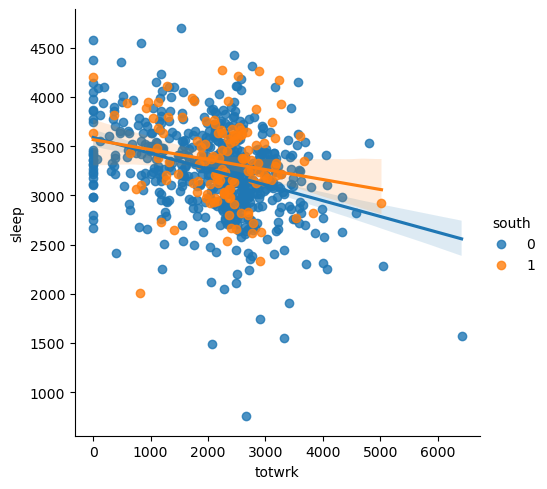

In [4]:
sns.lmplot(x='totwrk', y='sleep', hue='south', data=df);

# 1.2 sleep equation #1

$$ H_0: \beta_{sleep} = \beta_{totwrk} = \beta_{age} = \beta_{smsa} = 0 $$
$$ H_1: \beta_{sleep}^2 + \beta_{totwrk}^2 + \beta_{age}^2 + \beta_{smsa}^2 > 0 $$

In [12]:
data_string = '''R2                      0.115          0.126    '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', data_string)) 

In [14]:
F_obs = (unrest - rest)/(1-unrest)*(len(df)-8)/4
F_obs.round(2)

2.2

In [15]:
alpha = 0.05 
F_cr = stats.f.ppf(1-alpha,4,len(df)-8)
F_cr.round(2)

2.38

$F_{obs}<F_{cr}$ Данные согласуются с гипотезой $H_0$. Структурные сдвиги незначимы

# 1.3 sleep equation #2

$$ H_0: \beta_{sleep} = \beta_{totwrk} = \beta_{age} = \beta_{smsa} = 0 $$
$$ H_1: \beta_{sleep}^2 + \beta_{totwrk}^2 + \beta_{age}^2 + \beta_{smsa}^2 > 0 $$

In [17]:
date_string = '''R2                      0.115          0.131 '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', date_string)) 

In [18]:
F_obs = (unrest - rest)/(1-unrest)*(706-8)/4
F_obs.round(2)

3.21

In [20]:
alpha = 0.1
F_cr = stats.f.ppf(1-alpha,4,706-8)
F_cr.round(2)

1.95

$F_{obs}>F_{cr}$ Данные согласуются с гипотезой $H_1$. Структурные сдвиги значимы

# 1.4 wage equation #1

$$ H_0: \beta_{log(wage)} = \beta_{age} = \beta_{IQ} = \beta_{urban} = \beta_{married}= 0 $$
$$ H_1: \beta_{log(wage)}^2 + \beta_{age}^2 + \beta_{IQ}^2 + \beta_{urban}^2 + \beta_{married}^2> 0 $$

In [21]:
date_string = '''R2                      0.188          0.205  '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', date_string)) 

In [28]:
F_obs = (unrest - rest)/(1-unrest)*(706-10)/5
F_obs.round(2)

2.98

In [32]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha,5,706-10)
F_cr.round(2)

2.23

$F_{obs}>F_{cr}$ Данные согласуются с гипотезой $H_1$. Структурные сдвиги значимы

# 1.5 wage equation #2

$$ H_0: \beta_{log(wage)} = \beta_{age} = \beta_{IQ} = \beta_{urban} = \beta_{married}= 0 $$
$$ H_1: \beta_{log(wage)}^2 + \beta_{age}^2 + \beta_{IQ}^2 + \beta_{urban}^2 + \beta_{married}^2> 0 $$

In [30]:
date_string = '''R2                      0.146          0.182 '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', date_string)) 

In [31]:
F_obs = (unrest - rest)/(1-unrest)*(706-8)/4
F_obs.round(2)

7.68

In [33]:
alpha = 0.1
F_cr = stats.f.ppf(1-alpha,4,706-8)
F_cr.round(2)

1.95

$F_{obs}>F_{cr}$ Данные согласуются с гипотезой $H_1$. Структурные сдвиги значимы

# 2 Небинарные качественые признаки
# 2.1 diamond equation #1

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/Diamond.csv')
df_all = pd.get_dummies(df.loc[:,['carat','colour','certification','price']])
df_all

,carat,price,colour_D,colour_E,colour_F,colour_G,colour_H,colour_I,certification_GIA,certification_HRD,certification_IGI
0,0.30,1302,1,0,0,0,0,0,1,0,0
1,0.30,1510,0,1,0,0,0,0,1,0,0
2,0.30,1510,0,0,0,1,0,0,1,0,0
3,0.30,1260,0,0,0,1,0,0,1,0,0
4,0.31,1641,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
303,1.01,8175,0,0,0,0,0,1,0,1,0
304,1.02,10796,0,0,1,0,0,0,0,1,0
305,1.06,9890,0,0,0,0,1,0,0,1,0
306,1.02,8959,0,0,0,0,1,0,0,1,0


In [35]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+colour_E+colour_F+colour_G+colour_H+colour_I+certification_HRD+certification_IGI',data=df_all).fit()
model_d.params

Intercept            5.866015
carat                5.667499
I(carat ** 2)       -2.153394
colour_E            -0.076348
colour_F            -0.152412
colour_G            -0.227155
colour_H            -0.313470
colour_I            -0.408190
certification_HRD    0.042463
certification_IGI    0.085451
dtype: float64

$$ H_0: \beta_{colour_E} = \beta_{colour_F} = \beta_{colour_G} = \beta_{colour_H} = \beta_{colour_I} = 0 $$
$$ H_1: \beta_{colour_E}^2 + \beta_{colour_F}^2 + \beta_{colour_G}^2 + \beta_{colour_H}^2 + \beta_{colour_I} > 0 $$

In [36]:
model_d.f_test('colour_E=colour_F=colour_G=colour_H=colour_I=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=71.54686523424246, p=5.202465260125949e-49, df_denom=298, df_num=5>

In [37]:
stats.f.ppf(1-0.01,5,len(df_all)-5).round(2)

3.08

$F_{cr}<F_{obs}$ гипотезу $H_0$ отвергаем. Влияние значимо

$$ H_0: \beta_{certificationHRD} = \beta_{certificationIGI} = 0 $$
$$ H_1: \beta_{certificationHRD}^2 + \beta_{certificationIGI}^2 > 0 $$

In [39]:
model_d.f_test('certification_HRD=certification_IGI=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=13.084620097371202, p=3.5745772535777896e-06, df_denom=298, df_num=2>

In [40]:
stats.f.ppf(1-0.01,5,len(df_all)-5).round(2)

3.08

$F_{cr}<F_{obs}$ гипотезу $H_0$ отвергаем. Влияние значимо

# 2.2 diamond equation #2

$$ H_0: \beta_{colour_E} = \beta_{colour_F} = \beta_{colour_G} = \beta_{colour_H} = \beta_{colour_I} = \beta_{colour_J} = 0 $$
$$ H_1: \beta_{colour_E}^2 + \beta_{colour_F}^2 + \beta_{colour_G}^2 + \beta_{colour_H}^2 + \beta_{colour_I}^2 + \beta_{colour_J}^2 > 0 $$

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/diamonds.csv')
df_all = pd.get_dummies(df.loc[:,['price','carat','color','cut','x','y','z' ]])
df_all

,price,carat,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,326,0.23,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,1,0,0
1,326,0.21,3.89,3.84,2.31,0,1,0,0,0,0,0,0,0,0,1,0
2,327,0.23,4.05,4.07,2.31,0,1,0,0,0,0,0,0,1,0,0,0
3,334,0.29,4.20,4.23,2.63,0,0,0,0,0,1,0,0,0,0,1,0
4,335,0.31,4.34,4.35,2.75,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,5.75,5.76,3.50,1,0,0,0,0,0,0,0,0,1,0,0
53936,2757,0.72,5.69,5.75,3.61,1,0,0,0,0,0,0,0,1,0,0,0
53937,2757,0.70,5.66,5.68,3.56,1,0,0,0,0,0,0,0,0,0,0,1
53938,2757,0.86,6.15,6.12,3.74,0,0,0,0,1,0,0,0,0,0,1,0


In [67]:
df_all = df_all.rename(columns={'cut_Very Good': 'cut_VeryGood'})
df_all

,price,carat,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_VeryGood
0,326,0.23,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,1,0,0
1,326,0.21,3.89,3.84,2.31,0,1,0,0,0,0,0,0,0,0,1,0
2,327,0.23,4.05,4.07,2.31,0,1,0,0,0,0,0,0,1,0,0,0
3,334,0.29,4.20,4.23,2.63,0,0,0,0,0,1,0,0,0,0,1,0
4,335,0.31,4.34,4.35,2.75,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,5.75,5.76,3.50,1,0,0,0,0,0,0,0,0,1,0,0
53936,2757,0.72,5.69,5.75,3.61,1,0,0,0,0,0,0,0,1,0,0,0
53937,2757,0.70,5.66,5.68,3.56,1,0,0,0,0,0,0,0,0,0,0,1
53938,2757,0.86,6.15,6.12,3.74,0,0,0,0,1,0,0,0,0,0,1,0


In [68]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+color_E+color_F+color_G+color_H+color_I+color_J+cut_Good+cut_VeryGood+cut_Premium+cut_Ideal+x+y+z',data=df_all).fit()
model_d.params

Intercept        3.991634
carat            2.535459
I(carat ** 2)   -0.645788
color_E         -0.030235
color_F         -0.039489
color_G         -0.071381
color_H         -0.210150
color_I         -0.307512
color_J         -0.432402
cut_Good         0.118383
cut_VeryGood     0.177357
cut_Premium      0.161182
cut_Ideal        0.250758
x                0.338985
y                0.014541
z                0.063132
dtype: float64

In [69]:
model_d.f_test('color_E=color_F=color_G=color_H=color_I=color_J=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2282.3701477852505, p=0.0, df_denom=5.39e+04, df_num=6>

In [70]:
stats.f.ppf(1-0.05,6,len(df_all)-6).round(2)

2.1

$F_{cr}<F_{obs}$ гипотезу $H_0$ отвергаем. Влияние значимо

$$ H_0: \beta_{cutGOOD} = \beta_{cutVeryGood} = \beta_{cutPremium} = \beta_{cutIdeal} = 0 $$
$$ H_1: \beta_{cutGOOD}^2 + \beta_{cutVeryGood}^2 + \beta_{cutPremium}^2 + \beta_{cutIdeal}^2 > 0 $$

In [71]:
model_d.f_test('cut_Good=cut_VeryGood=cut_Premium=cut_Ideal=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=797.0664644237138, p=0.0, df_denom=5.39e+04, df_num=4>

In [72]:
alpha=0.05
stats.f.ppf(1-alpha,4,len(df_all)-16).round(2)

2.37

$F_{cr}<F_{obs}$ гипотезу $H_0$ отвергаем. Влияние значимо